In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Importing Data

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Analysis 
### Columns Selection

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Columns
### PassengerId
1- Just an encoder for name, no statistical relevance.
### Pclass
1- Can relate wealthness.
<br>2- Ordinal Data.
### Name
1- No apparent statistical relevance.
<br>2- Decision: DROP.
### Age
1- Relevant
<br> 2- Numerical Data.
<br> 3- Some missing values, check wheter replace with same mean/std or drop.
### SibSup
1- May be relevant.
<br> 2- Discrete numerical data.
### Parch
1- May be relevant.
<br> 2- Discrete numerical data.
### Ticket
1- Seems random
<br>2- May indicate room location or bought location, but need further study.
<br>3- Decision: DROP.
### Fare
1- Can relate to wealthness.
<br> 2- May have correlation with Pclass.
### Cabin
1- May indicate room location.
<br>2- Too many missing values.
<br>2- Decision: DROP.
### Embarked
1- May be relevant.
<br>2- Need to check for truly correlation.
<br>3- 2 missing values dropped.


In [5]:
data.set_index('PassengerId', inplace=True)

### Features analysis

In [6]:
#Defining an standard plot function
def hist_rate_plot(sliced_data, total_data, bins_range=10):
    hist_sliced = np.histogram(sliced_data.dropna(),bins=bins_range)[0]
    hist_total = np.histogram(total_data.dropna(),bins=bins_range)[0]
    hist_pct = (hist_sliced)/np.where((hist_total==0),1,hist_total)
    pct = pd.Series(hist_pct)
    pct.plot()
    plt.xticks(pct.index,labels = bins_range[:-1],rotation=90)
    plt.yticks([x/10 for x in range(0,11,1)])
    plt.grid()

In [7]:
# data with only not suvivors
data_die = data.loc[data.Survived == 0]

In [8]:
# data with only survivors
data_live = data.loc[data.Survived == 1]

### Pclass
##### Histogram for survivor and total in each Pclass

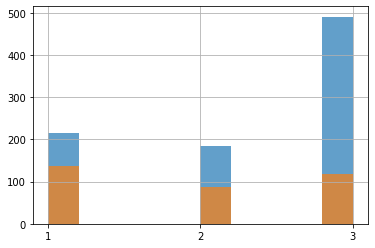

In [9]:
data['Pclass'].hist(alpha=0.7)
data_live['Pclass'].hist(alpha=0.7)
plt.xticks([1,2,3])
plt.show()

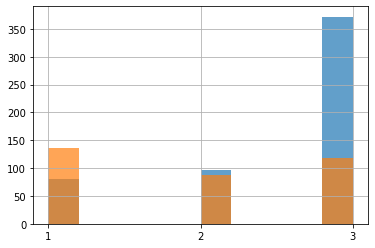

In [10]:
data_die['Pclass'].hist(alpha=0.7)
data_live['Pclass'].hist(alpha=0.7)
plt.xticks([1,2,3])
plt.show()

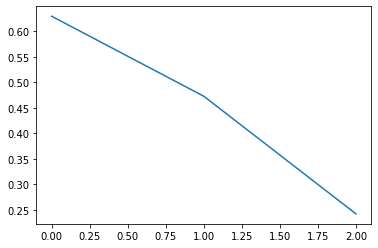

In [11]:
p1 = data.loc[data['Pclass']==1].loc[:,'Survived'].sum() / data.loc[data['Pclass']==1].loc[:,'Survived'].count()
p2 = data.loc[data['Pclass']==2].loc[:,'Survived'].sum() / data.loc[data['Pclass']==2].loc[:,'Survived'].count()
p3 = data.loc[data['Pclass']==3].loc[:,'Survived'].sum() / data.loc[data['Pclass']==3].loc[:,'Survived'].count()
plt.plot([p1,p2,p3])

It seems like the survivor rate is approximately linear for Pclass

### Sex
##### Histogram for survivor and total in each Sex

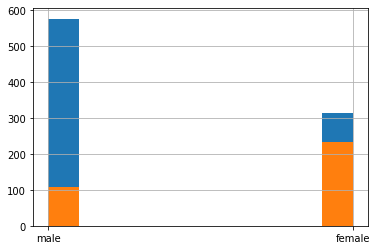

In [12]:
data['Sex'].hist()
data_live['Sex'].hist()
plt.show()

Survivor rate for women visiblely higher

##### Sex x Pclass

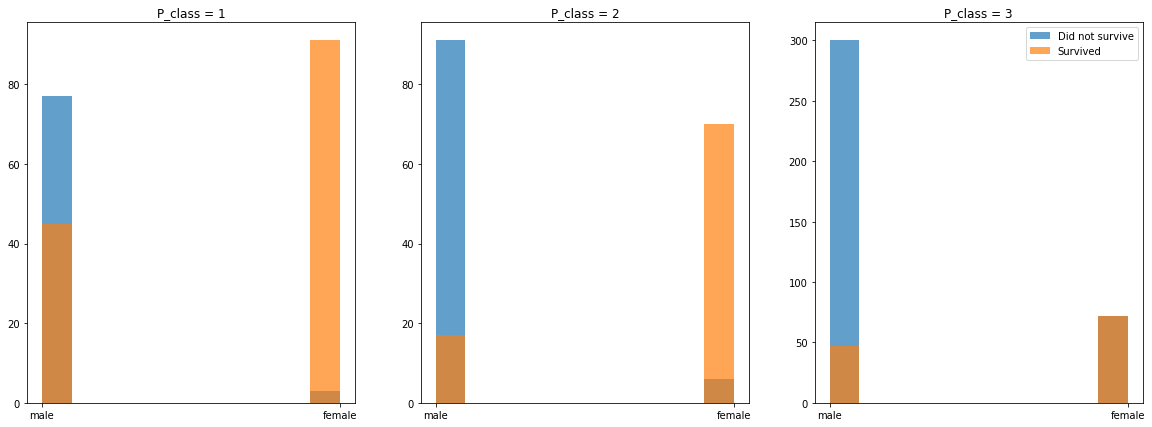

In [13]:
fig, ax = plt.subplots(ncols=3, figsize=(20,7))
ax[0].hist(data_die[data_die['Pclass']==1]['Sex'], alpha = 0.7, label='Did not survive')
ax[0].hist(data_live[data_live['Pclass']==1]['Sex'], alpha = 0.7, label='Survived')
ax[0].set_title('P_class = 1')

ax[1].hist(data_die[data_die['Pclass']==2]['Sex'], alpha = 0.7, label='Did not survive')
ax[1].hist(data_live[data_live['Pclass']==2]['Sex'], alpha = 0.7, label='Survived')
ax[1].set_title('P_class = 2')

ax[2].hist(data_die[data_die['Pclass']==3]['Sex'], alpha = 0.7, label='Did not survive')
ax[2].hist(data_live[data_live['Pclass']==3]['Sex'], alpha = 0.7, label='Survived')
ax[2].set_title('P_class = 3')

plt.legend()


Man survivor rate drascally fell from Pclass==1 to Pclass==2 the same for women from Pclass==2 to Pclass==3

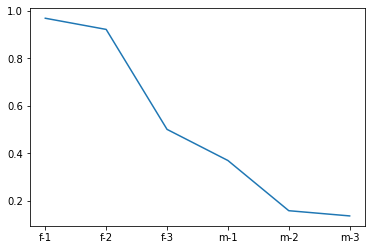

In [14]:
#Survivor rate when considering class and sex together
p1 = data.loc[data['Pclass']==1].loc[data['Sex']=='female'].loc[:,'Survived'].sum() / data.loc[data['Pclass']==1].loc[data['Sex']=='female'].loc[:,'Survived'].count()
p2 = data.loc[data['Pclass']==2].loc[data['Sex']=='female'].loc[:,'Survived'].sum() / data.loc[data['Pclass']==2].loc[data['Sex']=='female'].loc[:,'Survived'].count()
p3 = data.loc[data['Pclass']==3].loc[data['Sex']=='female'].loc[:,'Survived'].sum() / data.loc[data['Pclass']==3].loc[data['Sex']=='female'].loc[:,'Survived'].count()
p4 = data.loc[data['Pclass']==1].loc[data['Sex']=='male'].loc[:,'Survived'].sum() / data.loc[data['Pclass']==1].loc[data['Sex']=='male'].loc[:,'Survived'].count()
p5 = data.loc[data['Pclass']==2].loc[data['Sex']=='male'].loc[:,'Survived'].sum() / data.loc[data['Pclass']==2].loc[data['Sex']=='male'].loc[:,'Survived'].count()
p6 = data.loc[data['Pclass']==3].loc[data['Sex']=='male'].loc[:,'Survived'].sum() / data.loc[data['Pclass']==3].loc[data['Sex']=='male'].loc[:,'Survived'].count()

plt.plot([p1,p2,p3,p4,p5,p6])
plt.xticks([*range(0,6,1)], labels=('f-1','f-2','f-3','m-1','m-2','m-3'))
plt.show()

This chart show a correlation between the features, showing a survivor rate drop

### Age
##### Histogram for survivor and total in each Age

In [15]:
bins_range = [x for x in range(0,81,5)]

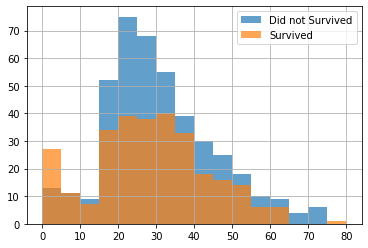

In [16]:
data_die['Age'].hist(bins=bins_range, alpha=0.7, label='Did not Survived')
data_live['Age'].hist(bins=bins_range, alpha=0.7, label = 'Survived')
plt.legend()
plt.show()

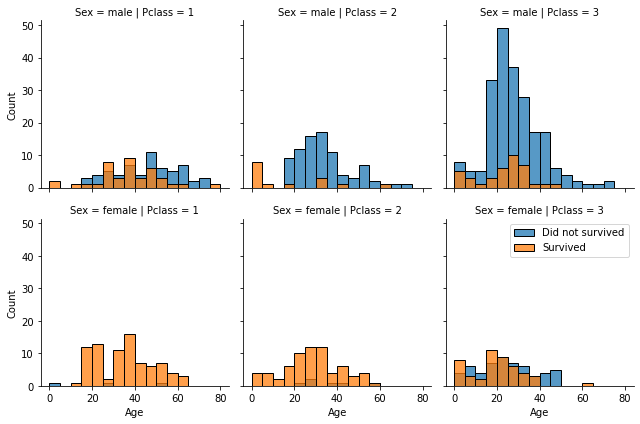

In [17]:
g = sns.FacetGrid(data, col='Pclass', row='Sex', hue="Survived")
g.map(sns.histplot, 'Age', bins=bins_range)
plt.legend(['Did not survived','Survived'])

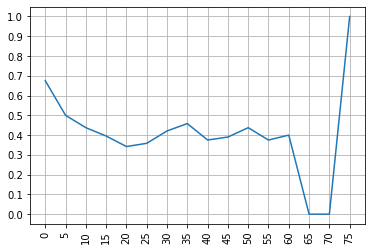

In [18]:
hist_rate_plot(data_live['Age'],data['Age'], bins_range)

Alone, the Age did not appear to have much relevance

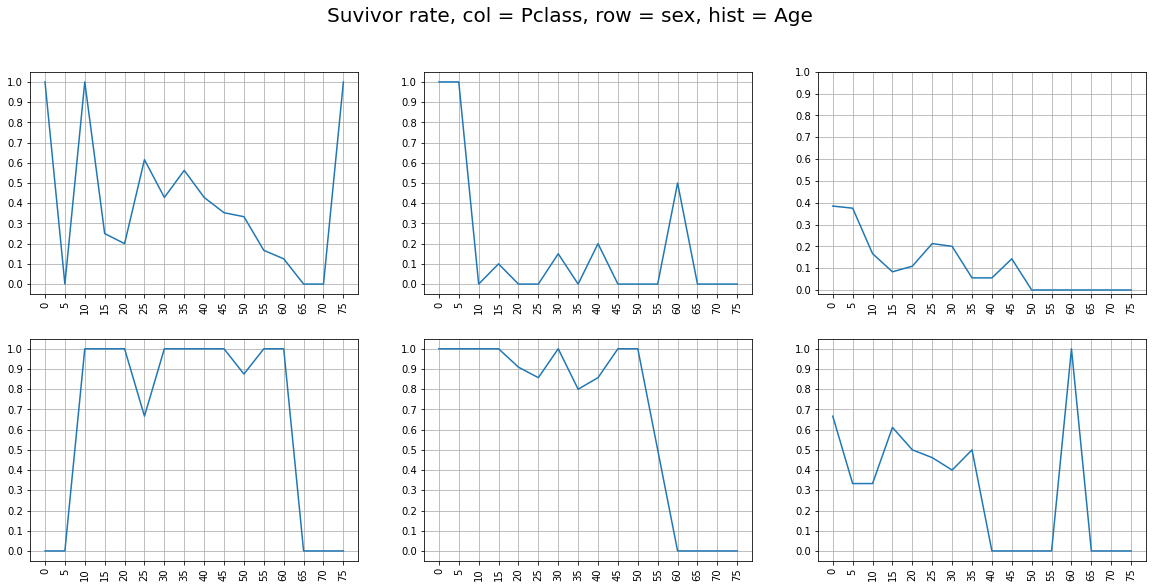

In [19]:
fig, ax = plt.subplots(nrows=2,ncols=3, figsize=(20,9))
fig.suptitle("Suvivor rate, col = Pclass, row = sex, hist = Age", fontsize=20)
plt.sca(ax[0,0]) 
hist_rate_plot(data_live.loc[data_live['Pclass']==1].loc[data_live['Sex']=='male']['Age'],data.loc[data['Pclass']==1].loc[data['Sex']=='male']['Age'], bins_range)
plt.sca(ax[0,1]) 
hist_rate_plot(data_live.loc[data_live['Pclass']==2].loc[data_live['Sex']=='male']['Age'],data.loc[data['Pclass']==2].loc[data['Sex']=='male']['Age'], bins_range)
plt.sca(ax[0,2]) 
hist_rate_plot(data_live.loc[data_live['Pclass']==3].loc[data_live['Sex']=='male']['Age'],data.loc[data['Pclass']==3].loc[data['Sex']=='male']['Age'], bins_range)
plt.sca(ax[1,0]) 
hist_rate_plot(data_live.loc[data_live['Pclass']==1].loc[data_live['Sex']=='female']['Age'],data.loc[data['Pclass']==1].loc[data['Sex']=='female']['Age'], bins_range)
plt.sca(ax[1,1]) 
hist_rate_plot(data_live.loc[data_live['Pclass']==2].loc[data_live['Sex']=='female']['Age'],data.loc[data['Pclass']==2].loc[data['Sex']=='female']['Age'], bins_range)
plt.sca(ax[1,2]) 
hist_rate_plot(data_live.loc[data_live['Pclass']==3].loc[data_live['Sex']=='female']['Age'],data.loc[data['Pclass']==3].loc[data['Sex']=='female']['Age'], bins_range)


Women from Pclass 1 and 2 have almost 100% survive rate
<br>Men and Women form Pclass 3 have linear pattern, except for high ages which lack of data

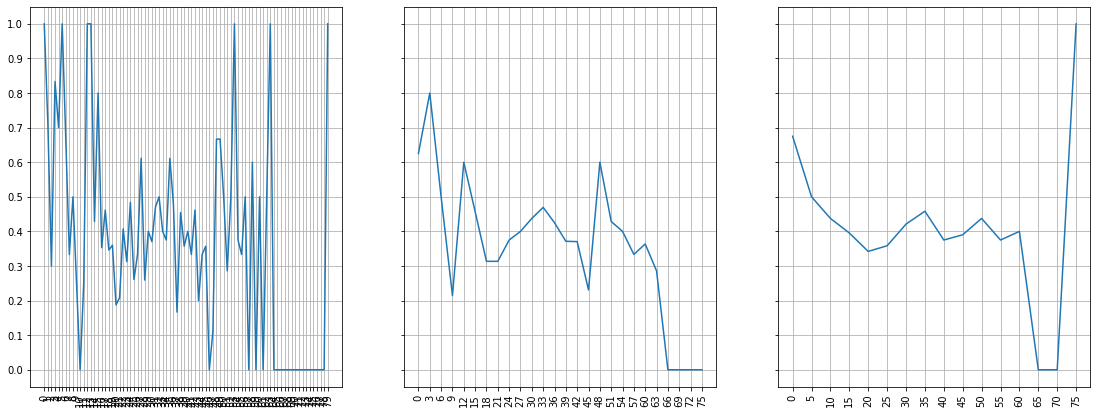

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(19,7))
plt.sca(ax[0]) 
hist_rate_plot(data_live['Age'],data['Age'], bins_range=[*range(0,81,1)])
plt.sca(ax[1]) 
hist_rate_plot(data_live['Age'],data['Age'], bins_range=[*range(0,81,3)])
plt.sca(ax[2]) 
hist_rate_plot(data_live['Age'],data['Age'], bins_range=[*range(0,81,5)])

Figure above shows that using a continuos variable may lead to a seemly random feature, that is probably due to lack of data. The use of age groups seems to lead to a more concise information.

### SibSp
##### Histogram for survivor and total in each SibSp

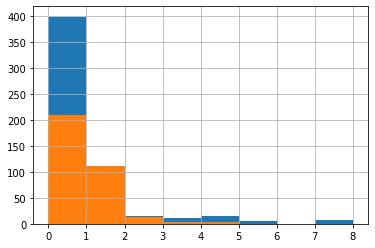

In [21]:
data_die['SibSp'].hist(bins=[i for i in range(0,9)])
data_live['SibSp'].hist(bins=[i for i in range(0,9)])
plt.show()

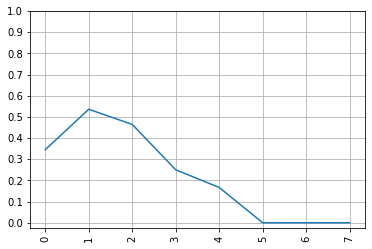

In [22]:
hist_rate_plot(data_live['SibSp'],data['SibSp'], bins_range=[i for i in range(0,9)])

In [23]:
len(data[data['SibSp'] >= 2])

74

Seem to have linear rate, but

Only few data with SibSp > 1, consider treat as binary feature

### Parch
##### Histogram for survivor and total in each Parch

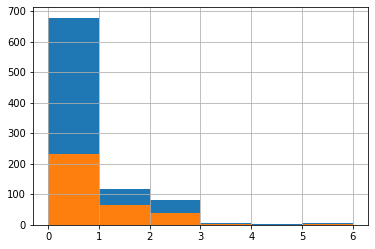

In [24]:
data['Parch'].hist(bins=[i for i in range(0,7)])
data_live['Parch'].hist(bins=[i for i in range(0,7)])
plt.show()

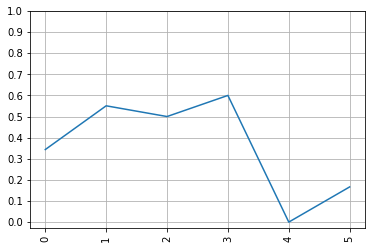

In [25]:
hist_rate_plot(data_live['Parch'],data['Parch'], bins_range=[i for i in range(0,7)])

In [26]:
len(data[data['Parch'] >= 4])

10

As there are only 10 observations of Parch >=4 it will be grouped in one group 3+

### Embarked

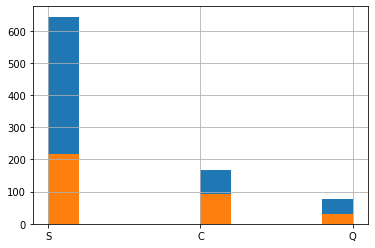

In [27]:
data['Embarked'].hist()
data_live['Embarked'].hist()
plt.show()

On a first look, seem to have relevance

It will be checked if this might be related to other variables

P(Survive|Embarked in S)

In [28]:
data_live[data_live['Embarked']=="S"]['Embarked'].count()/data[data['Embarked']=="S"]['Embarked'].count()

0.33695652173913043

P(Survive|Embarked in C)

In [29]:
data_live[data_live['Embarked']=="C"]['Embarked'].count()/data[data['Embarked']=="C"]['Embarked'].count()

0.5535714285714286

P(Survive|Embarked in Q)

In [30]:
data_live[data_live['Embarked']=="Q"]['Embarked'].count()/data[data['Embarked']=="Q"]['Embarked'].count()

0.38961038961038963

P(Pclass=1|Embarked in C)

In [31]:
data.loc[data['Pclass']==1].loc[data['Embarked']=="C"]['Embarked'].count()/data[data['Embarked']=="C"]['Embarked'].count()

0.5059523809523809

Higher survivor rate from people who embarked in C explained due the higher Pclass==1 rate

It may have no statistical relevance and it will be decided wheter to exclude this feature during analysis

### Fare

In [32]:
data['Fare'].max()

512.3292

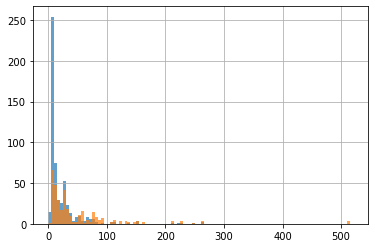

In [42]:
plt.figure()
data_die['Fare'].hist(bins = [*range(0,521,5)], alpha=0.7)
data_live['Fare'].hist(bins = [*range(0,521,5)], alpha=0.7)
plt.show()

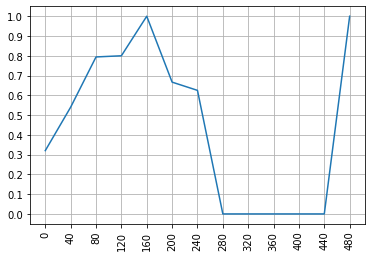

In [43]:
fig, ax = plt.subplots()
plt.sca(ax)
hist_rate_plot(data_live['Fare'],data['Fare'], bins_range=[*range(0,521,40)])

The payment value varies a lot, it will be grouped whithin same samples to look better the data

In [35]:
cuts = 15

In [36]:
data['cat_fare'] = pd.qcut(data['Fare'], q=cuts, labels=[*range(0,cuts,1)])

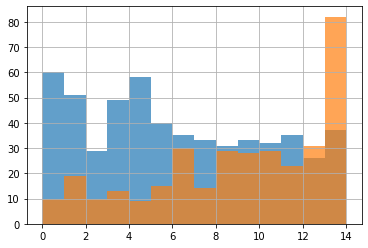

In [44]:
plt.figure()
data.loc[data['Survived']==0].loc[:,'cat_fare'].hist(bins = [*range(0,cuts,1)], alpha=0.7)
data.loc[data['Survived']==1].loc[:,'cat_fare'].hist(bins = [*range(0,cuts,1)], alpha=0.7)
plt.show()

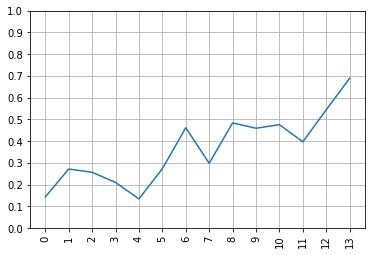

In [41]:
hist_rate_plot(data.loc[data['Survived']==1].loc[:,'cat_fare'],
               data.loc[:,'cat_fare'],
               bins_range = [*range(0,cuts,1)])

Data seems to be more linear and predictible.

Need to check relevance